In [51]:
'''
q1) Analyze the performance of kNN with respect to accuracy, recall, precision, FPR, and ROC metrics
obtained for heart dataset.
'''

'\nq1) Analyze the performance of kNN with respect to accuracy, recall, precision, FPR, and ROC metrics\nobtained for heart dataset.\n'

In [52]:
import pandas as pd 

df = pd.read_csv('heart_data.csv')
df.head()

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [53]:
## analysis 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Gender          918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [54]:
df.Age.unique()

array([40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 60, 36, 44, 53, 52, 51,
       56, 41, 32, 65, 35, 59, 50, 47, 31, 46, 57, 55, 63, 66, 34, 33, 61,
       29, 62, 28, 30, 74, 68, 72, 64, 69, 67, 73, 70, 77, 75, 76, 71],
      dtype=int64)

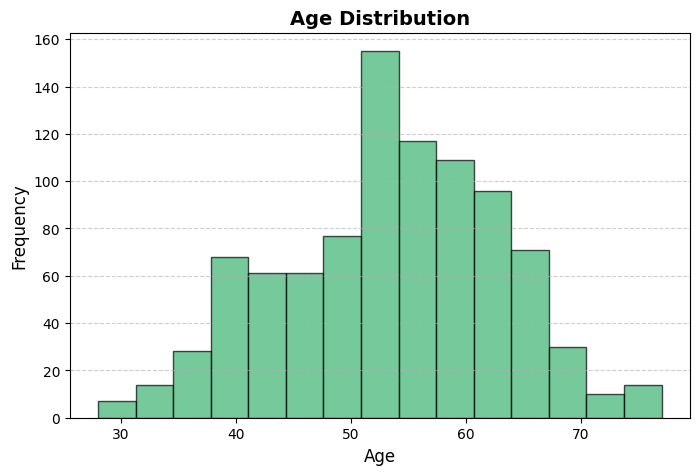

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5)) # Set figure size
plt.hist(df["Age"], bins=15, color="mediumseagreen", edgecolor="black", alpha=0.7)

# Add labels and title
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Age Distribution", fontsize=14, fontweight="bold")

plt.grid(axis="y", linestyle="--", alpha=0.6)


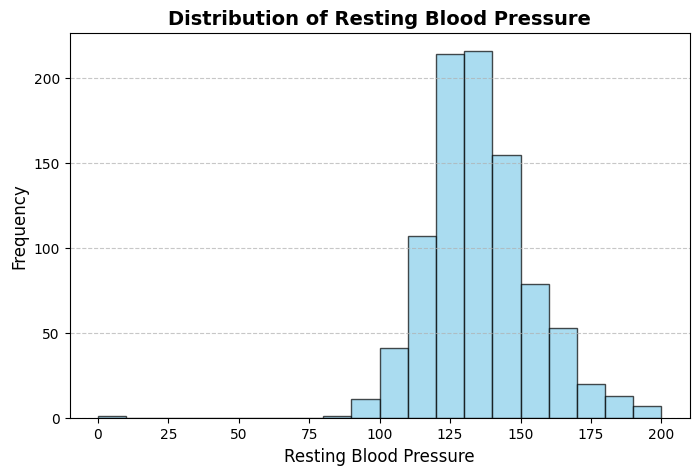

In [56]:
plt.figure(figsize=(8, 5))
plt.hist(df["RestingBP"], bins=20, color="skyblue", 
         edgecolor="black", alpha=0.7)

# Add labels and title
plt.xlabel("Resting Blood Pressure", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Resting Blood Pressure", fontsize=14, fontweight="bold")

plt.grid(axis="y", linestyle="--", alpha=0.7)

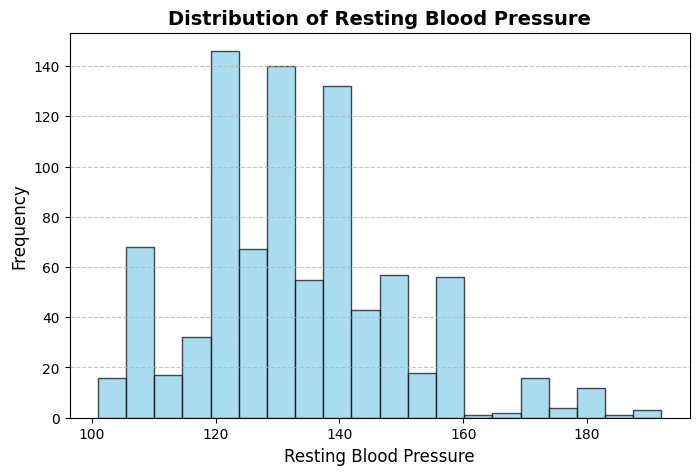

In [57]:
# we see some 0 values, since they are low, lets just remove and make 100< bp <200
df = df[(df["RestingBP"] >100) & (df["RestingBP"] < 200)]

plt.figure(figsize=(8, 5))
plt.hist(df["RestingBP"], bins=20, color="skyblue", 
         edgecolor="black", alpha=0.7)

# Add labels and title
plt.xlabel("Resting Blood Pressure", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Resting Blood Pressure", fontsize=14, fontweight="bold")

plt.grid(axis="y", linestyle="--", alpha=0.7)

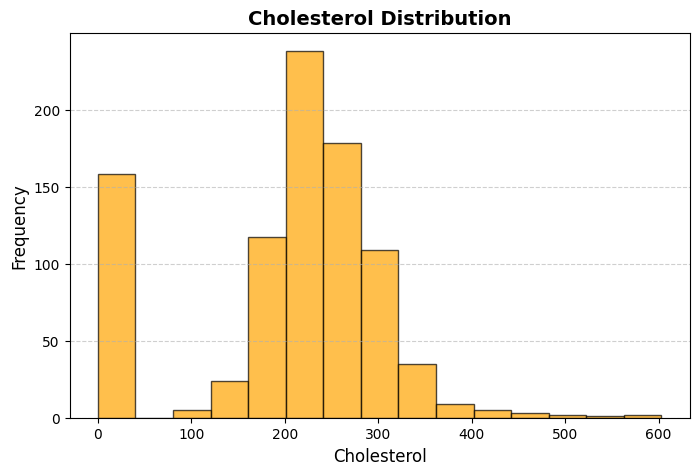

In [58]:
plt.figure(figsize=(8, 5))  
plt.hist(df["Cholesterol"], bins=15, color="orange", edgecolor="black", alpha=0.7)

# Add labels and title
plt.xlabel("Cholesterol", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Cholesterol Distribution", fontsize=14, fontweight="bold")

plt.grid(axis="y", linestyle="--", alpha=0.6)


although there were no null values but here we can see that cholesterol havee '0'.
we need to handle these

In [59]:
# check how many rows have 0 cholestrol
df[df['Cholesterol']==0].shape[0]

158

In [60]:
df.Cholesterol.unique()

array([289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, 164, 204,
       234, 273, 196, 201, 267, 184, 288, 215, 209, 260, 468, 188, 518,
       167, 224, 172, 186, 254, 306, 250, 177, 227, 230, 294, 264, 259,
       175, 318, 223, 216, 340, 233, 205, 245, 194, 270, 213, 365, 342,
       277, 202, 297, 225, 246, 412, 265, 182, 218, 268, 163, 529, 100,
       206, 238, 139, 263, 291, 229, 307, 210, 329, 147,  85, 269, 275,
       179, 392, 466, 129, 241, 255, 276, 282, 338, 160, 156, 248, 272,
       240, 393, 161, 228, 292, 388, 166, 247, 331, 341, 243, 279, 198,
       249, 168, 603, 190, 185, 290, 212, 231, 222, 235, 320, 187, 266,
       287, 404, 312, 251, 328, 285, 280, 192, 193, 308, 257, 132, 219,
       226, 217, 303, 298, 256, 295, 173, 315, 281, 309, 200, 336, 355,
       326, 171, 491, 271, 274, 394, 221, 126, 305, 242, 220, 347, 253,
       344, 358, 169, 181,   0, 236, 203, 153, 316, 311, 252, 458, 384,
       258, 349, 142, 197, 113, 261, 310, 232, 110, 123, 170, 36

In [61]:
# we can not remove 172 rows, handling them with mean 
mean_cholesterol = df[df["Cholesterol"] > 0]["Cholesterol"].mean()

# Replace 0 values with the mean
df["Cholesterol"] = df["Cholesterol"].replace(0, mean_cholesterol)

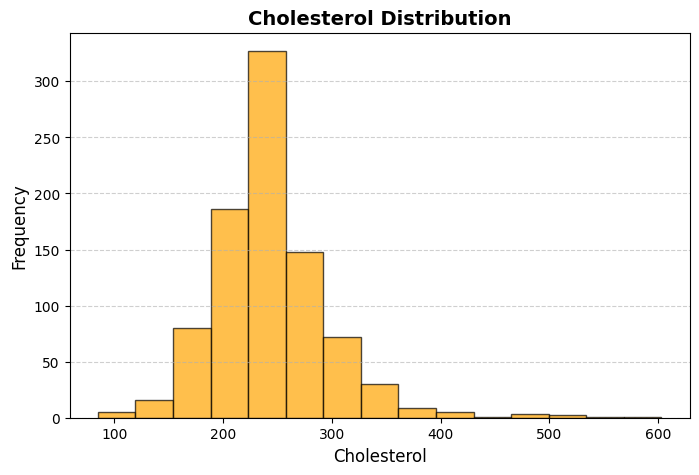

In [62]:
plt.figure(figsize=(8, 5))  
plt.hist(df["Cholesterol"], bins=15, color="orange", edgecolor="black", alpha=0.7)

# Add labels and title
plt.xlabel("Cholesterol", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Cholesterol Distribution", fontsize=14, fontweight="bold")

plt.grid(axis="y", linestyle="--", alpha=0.6)


In [63]:
# now we can also see some outliers with 500 or more cholesterol, 
# they can affect model accuracy, for simplicity, lets just remove them
df = df[df['Cholesterol'] < 450]

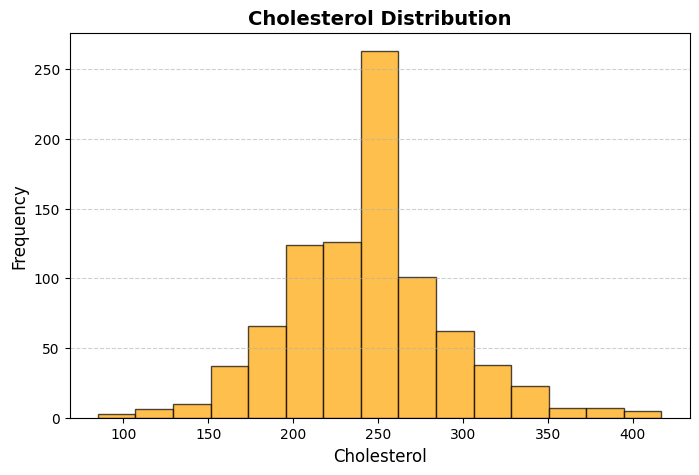

In [64]:
plt.figure(figsize=(8, 5))  
plt.hist(df["Cholesterol"], bins=15, color="orange", edgecolor="black", alpha=0.7)

# Add labels and title
plt.xlabel("Cholesterol", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Cholesterol Distribution", fontsize=14, fontweight="bold")

plt.grid(axis="y", linestyle="--", alpha=0.6)

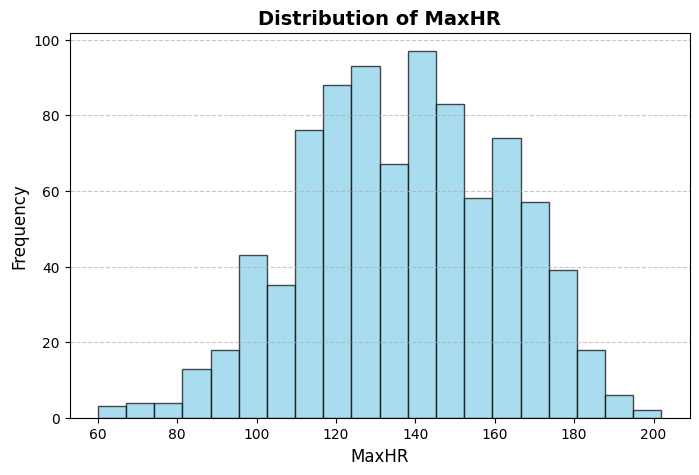

In [66]:
plt.figure(figsize=(8, 5))
plt.hist(df["MaxHR"], bins=20, color="skyblue", 
         edgecolor="black", alpha=0.7)

# Add labels and title
plt.xlabel("MaxHR", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of MaxHR", fontsize=14, fontweight="bold")

plt.grid(axis="y", linestyle="--", alpha=0.7)

([<matplotlib.patches.Wedge at 0x1f7b22f9750>,
 [Text(-0.606163994009572, -0.9179135102864342, 'ASY'),
  Text(1.0713825138374442, 0.24927797544780925, 'NAP'),
  Text(0.04765378632151875, 1.0989672955321388, 'ATA'),
  Text(-0.72136772325667, 0.8304388043940918, 'TA')],
 [Text(-0.3306349058234029, -0.5006800965198731, '53.6%'),
  Text(0.5843904620931514, 0.13596980478971413, '22.2%'),
  Text(0.025992974357192045, 0.5994367066538938, '19.1%'),
  Text(-0.3934733035945472, 0.4529666205785955, '5.0%')])

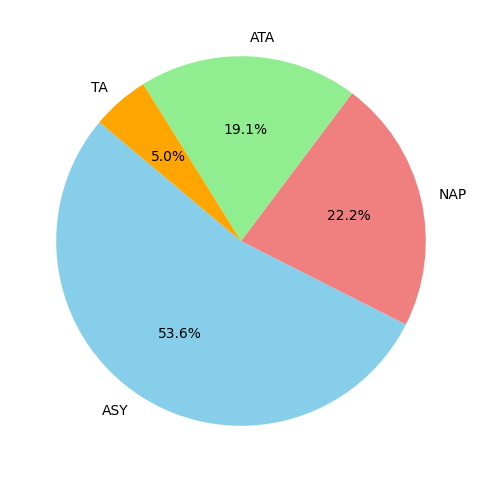

In [73]:
plt.figure(figsize=(6,6))
plt.pie(df['ChestPainType'].value_counts(), labels=df['ChestPainType'].value_counts().index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgreen', 'orange'])


In [74]:
## encoding the features to see correlation 
# Binary Encoding
df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'Y': 1, 'N': 0})
df.head()

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289.0,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180.0,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283.0,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214.0,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195.0,0,Normal,122,0,0.0,Up,0


In [76]:
## since other categorical columns are not ordinal, we will one hot encode
df_encoded = pd.get_dummies(df, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=True)

In [78]:
df_encoded = df_encoded.astype(int)
df_encoded.head()

,Age,Gender,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0,0,1,0,0,1,0,0,1
1,49,0,160,180,0,156,0,1,1,0,1,0,1,0,1,0
2,37,1,130,283,0,98,0,0,0,1,0,0,0,1,0,1
3,48,0,138,214,0,108,1,1,1,0,0,0,1,0,1,0
4,54,1,150,195,0,122,0,0,0,0,1,0,1,0,0,1


In [79]:
## normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Perform normalization on selected columns 
df_normalized = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

df_normalized.head()

,Age,Gender,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,0.244898,1.0,0.428571,0.614458,0.0,0.788732,0.0,0.250,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.428571,0.0,0.648352,0.286145,0.0,0.676056,0.0,0.375,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.183673,1.0,0.318681,0.596386,0.0,0.267606,0.0,0.250,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.408163,0.0,0.406593,0.388554,0.0,0.338028,1.0,0.375,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.530612,1.0,0.538462,0.331325,0.0,0.436620,0.0,0.250,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [85]:
X = df_normalized.drop('HeartDisease', axis=1)
y = df_normalized['HeartDisease']

In [86]:
## train test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [87]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [89]:
# Make predictions
y_pred = knn.predict(X_test)
y_pred

array([0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 1., 0.])

Accuracy: 0.9034
Precision: 0.9043
Recall: 0.9140
FPR: 0.1084
F1 Score: 0.9091
ROC AUC: 0.9028


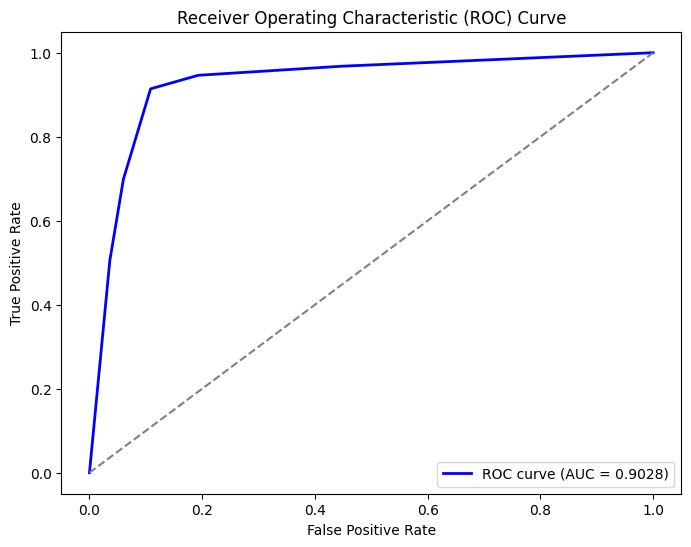

In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# Confusion Matrix (to get FPR)
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# False Positive Rate (FPR)
fpr = fp / (fp + tn)

# F1 Score (optional but informative)
f1 = f1_score(y_test, y_pred)

# ROC Curve and AUC
fpr_roc, tpr_roc, thresholds_roc = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"FPR: {fpr:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_roc, tpr_roc, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Since the AUC is 0.9028, this suggests that the model has high predictive capability, distinguishing between the two classes effectively.

In [91]:
''' 
 q2) Test the kNN algorithm with k=3, 6, 8, and 9 on heart dataset. 
 Study the impact on performance metrics.
'''

knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train) 

knn6 = KNeighborsClassifier(n_neighbors=6)
knn6.fit(X_train, y_train)

knn8 = KNeighborsClassifier(n_neighbors=8)
knn8.fit(X_train, y_train)

knn9 = KNeighborsClassifier(n_neighbors=9)
knn9.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [92]:
# Predict using each trained model
y_pred3 = knn3.predict(X_test)
y_pred6 = knn6.predict(X_test)
y_pred8 = knn8.predict(X_test)
y_pred9 = knn9.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Function to calculate metrics
def calculate_metrics(model, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    # Confusion Matrix for FPR calculation
    cm = confusion_matrix(y_true, y_pred)
    TN, FP, FN, TP = cm.ravel()
    fpr = FP / (FP + TN)
    
    # ROC Curve and AUC calculation
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability for the positive class
    fpr_roc, tpr_roc, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr_roc, tpr_roc)
    
    return accuracy, precision, recall, f1, fpr, roc_auc

# Calculate metrics for each kNN model
metrics3 = calculate_metrics(knn3, y_test, y_pred3)
metrics6 = calculate_metrics(knn6, y_test, y_pred6)
metrics8 = calculate_metrics(knn8, y_test, y_pred8)
metrics9 = calculate_metrics(knn9, y_test, y_pred9)

# Display metrics for each kNN model
metrics_dict = {
    'k=3': metrics3,
    'k=6': metrics6,
    'k=8': metrics8,
    'k=9': metrics9
}

# Print metrics in a readable format
for k, metrics in metrics_dict.items():
    print(f"Metrics for {k}:")
    print(f"  Accuracy: {metrics[0]:.4f}")
    print(f"  Precision: {metrics[1]:.4f}")
    print(f"  Recall: {metrics[2]:.4f}")
    print(f"  F1-Score: {metrics[3]:.4f}")
    print(f"  FPR: {metrics[4]:.4f}")
    print(f"  ROC AUC: {metrics[5]:.4f}")


Metrics for k=3:
  Accuracy: 0.8864
  Precision: 0.9101
  Recall: 0.8710
  F1-Score: 0.8901
  FPR: 0.0964
  ROC AUC: 0.9158


Metrics for k=6:
  Accuracy: 0.8636
  Precision: 0.9059
  Recall: 0.8280
  F1-Score: 0.8652
  FPR: 0.0964
  ROC AUC: 0.9387


Metrics for k=8:
  Accuracy: 0.8807
  Precision: 0.9000
  Recall: 0.8710
  F1-Score: 0.8852
  FPR: 0.1084
  ROC AUC: 0.9502


Metrics for k=9:
  Accuracy: 0.8807
  Precision: 0.8913
  Recall: 0.8817
  F1-Score: 0.8865
  FPR: 0.1205
  ROC AUC: 0.9477




In [95]:
''' 
 q3) Test the kNN algorithm with Euclidean and Manhattan distance metrics on heart dataset. Study the
    impact on performance metrics.
'''

knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train)

knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)

y_pred_euclidean = knn_euclidean.predict(X_test)
y_pred_manhattan = knn_manhattan.predict(X_test)


metrics_dict = {
    'euclidean': calculate_metrics(knn_euclidean, y_test, y_pred_euclidean),
    'manhattan': calculate_metrics(knn_manhattan, y_test, y_pred_manhattan)
}

# Print metrics in a readable format
for k, metrics in metrics_dict.items():
    print(f"Metrics for {k}:")
    print(f"  Accuracy: {metrics[0]:.4f}")
    print(f"  Precision: {metrics[1]:.4f}")
    print(f"  Recall: {metrics[2]:.4f}")
    print(f"  F1-Score: {metrics[3]:.4f}")
    print(f"  FPR: {metrics[4]:.4f}")
    print(f"  ROC AUC: {metrics[5]:.4f}")
    print('****************')


Metrics for euclidean:
  Accuracy: 0.9034
  Precision: 0.9043
  Recall: 0.9140
  F1-Score: 0.9091
  FPR: 0.1084
  ROC AUC: 0.9284
****************
Metrics for manhattan:
  Accuracy: 0.9091
  Precision: 0.9053
  Recall: 0.9247
  F1-Score: 0.9149
  FPR: 0.1084
  ROC AUC: 0.9313
****************
